In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import warnings

sns.set(font_scale=1.3, 
        font='Calibri', 
        style="whitegrid")

## Carregando os dados

### Dados sobre as questões feitas pelos usuários

In [3]:
df_questions = pd.read_json('data/BASE B/questions.json')
df_questions['QuestionDate'] = pd.to_datetime(df_questions['QuestionDate'])
df_questions.head()

,StudentId,QuestionDate,QuestionSnippet,StudentClient
0,12970655,2013-09-04 14:09:25.963,O que é mais importante para um projeto: escop...,NaN
1,12970655,2013-09-04 15:36:51.083,Você pode ter um negócio/produto bem sucedido ...,NaN
2,12970655,2013-10-30 19:41:43.137,Custos com consultoria para planejar um projet...,NaN
3,12970655,2013-10-30 19:19:15.517,CAPEX: investimento em consultoria entra como ...,NaN
4,12970655,2013-10-30 19:38:06.420,Custos com consultoria para planejar um projet...,NaN


In [21]:
df_questions.groupby(['StudentId'])['QuestionSnippet'].count().sort_values(ascending=False)

StudentId
36619758    78
52684890    76
53791397    59
2449655     45
7308309     24
            ..
62490564     1
62514900     1
62543464     1
62544540     1
49918755     1
Name: QuestionSnippet, Length: 2240, dtype: int64

In [16]:
pd.set_option('display.max_colwidth', 100)
df_questions.query('StudentId == 36619758')['QuestionSnippet']

3202              tenho prova unopar Raciocínio lógico e matemático chama 32988499570
3203                    prova unopar Raciocínio lógico e matemático chama 32988499570
3204                                                         Prova unopar 32988499570
3205                                                    prova unopar wsp 32 988499570
3206          Raciocínio logico e matemático. prova da unopar  chama wsp 88 8136 2988
                                            ...                                      
3275    unopar provas formação integral em saúde hoje tenho prova chama (88)8136-2988
3276      tenho prova formação integral em saúde hoje tenho prova chama (88)8136-2988
3277                      ciência humana socais  hoje tenho prova chama (88)8136-2988
3278                                                        prova unopar 43 9107-7084
3279                              alunos interessado provas unopar chama 43 9107-7084
Name: QuestionSnippet, Length: 78, dtype: object

### Dados sobre as respostas dadas pelos usuários
Fazendo o parsing das respostas que vieram com elementos de HTML.

In [6]:
df_answers = pd.read_json('data/BASE B/answers.json')
df_answers['AnswerDate'] = pd.to_datetime(df_answers['AnswerDate'])

# Supress warnings to run the BeautifulSoup to ignore URLs in the answers
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
original_answers = df_answers['AnswerSnippet'].copy() # Creating a copy to show some stuff later
df_answers['AnswerSnippet'] = df_answers['AnswerSnippet'].map(lambda x: BeautifulSoup(x).text.replace("\n", ""))
warnings.resetwarnings()

df_answers.head()

,StudentId,AnswerDate,AnswerSnippet,StudentClient
0,12970655,2013-08-30 12:27:57.190,Vou tentar simplificar ainda mais...<str,NaN
1,12970655,2013-09-04 14:03:18.240,O centil divide algo em 100 partes. Cada centil é 1 parte das 100 partes.,NaN
2,12970655,2013-09-05 13:20:09.513,Ou será que o problema que esses produtos solucionam é o TÉDIO? =),NaN
3,12970655,2013-09-04 19:01:56.357,Excelente pergunta! Abaixo estão as minhas lições em ordem de importân,NaN
4,12970655,2013-11-12 00:06:05.200,Vamos supor que você se compromete a comprar um imóvel de R$ 500.000 em 50 parcelas,NaN


#### Contagem de respostas por usuário

In [7]:
df_answers.groupby(['StudentId'])['AnswerSnippet'].count().sort_values(ascending=False)

StudentId
70700878    124
52374651     67
53791397     62
78378179     56
60827919     50
           ... 
59300762      1
59230582      1
59133236      1
59051854      1
3546          1
Name: AnswerSnippet, Length: 3068, dtype: int64

#### As 124 respostas me chamaram a atenção e esse aluno parece gostar bastante de postar vários links, inclusives externos ao PD
Não sei se há algum tipo de filtro a esse tipo de conteúdo. Talvez esconder URLs externas ao domínio do PD ou, pelo menos, avisar ao usuário que ele está saindo do domínio e que a plataforma não se responsabiliza a partir desse ponto.

In [8]:
pd.set_option('display.max_colwidth', 100)
df_answers.query('StudentId == 70700878')['AnswerSnippet']

650                                                                        para quem se interessa e
651      aqui neste link tem mais de 300 livros para abaixar que vão te ajudar a tirar suas duvidas
652    Neste link  https://mega.co.nz/#F!Ns4UkDCJ!Ep49t57YcQMIeoiIA6rdpQ tem genes VIII e genes XI 
653            neste link tem alguns livros de patologia que talvez possa te ajudar LINK https://me
654                              neste link tem alguns livros de Hemato para vc abaixar   <a href="
                                                   ...                                             
769              neste link vc vai encontrar livros que vão te ajudar<a href="../../arquivo/1726254
770              neste link vc vai encontrar livros que vão te ajudar<a href="../../arquivo/1726254
771            neste link vc vai encontrar <a href="../../arquivo/17262543/sao-mais-350-livros-com-
772              neste link vc vai encontrar livros que vão te ajudar<a href="../../arquivo/1726254


#### Tamanho das respostas
Os 100 caracteres são o limite para extrair o snippet, porém há respostas muito curtas que muito provavelmente não respondem à pergunta do usuário. Inclusive, algumas respostas são formadas apenas por caracteres especiais.

In [20]:
df_answers[df_answers['AnswerSnippet'].str.match(r'^[^a-zA-Z0-9]+$')]

,StudentId,AnswerDate,AnswerSnippet,StudentClient
82,79626956,2017-11-29 10:42:54.641832,:),Website
153,20863702,2015-08-26 17:12:22.370000,=\,Website
217,28332695,2018-05-17 23:03:05.048545,..,Website
218,28332695,2018-05-17 23:03:10.142826,...,Website
219,28332695,2018-05-17 23:02:52.231273,..,Website
...,...,...,...,...
7408,10269728,2017-11-20 12:23:52.569639,.,Website
7446,61771473,2017-11-21 10:25:06.162337,...,Website
7479,50149742,2018-04-18 21:20:45.305708,?,Website
7510,56220010,2018-05-15 13:31:32.627070,?,Android | 7.0 | sdk 24


### Dados sobre os estudates

In [22]:
df_students = pd.read_json('data/BASE B/students.json')
df_students['RegisteredDate'] = pd.to_datetime(df_students['RegisteredDate'])
df_students.head()

,Id,RegisteredDate,UniversityName,CourseName,State,SignupSource,City,StudentClient
0,12970655,2012-05-29 15:22:27.490,PUC-RIO,Administração,Rio de Janeiro,Email,NaN,NaN
1,59873654,2012-09-03 20:32:04.853,UFF,Direito do Trabalho e Segurança Social,Rio de Janeiro,Facebook,Rio de Janeiro,NaN
2,3664695,2012-09-10 20:26:30.253,UNB,Enfermagem,Distrito Federal,Facebook,NaN,NaN
3,15207697,2012-09-05 15:31:08.090,UERJ,Engenharia de Produção Mecânica,Rio de Janeiro,Facebook,Resende,NaN
4,36988693,2012-10-15 21:34:51.143,UFU,Engenharia Elétrica,NaN,Facebook,NaN,NaN


In [23]:
df_students.groupby('CourseName')['Id'].count().sort_values(ascending=False).head(20)

CourseName
Direito                               9862
Administração                         4099
Engenharia Civil                      3585
Contabilidade / Ciências Contábeis    2744
Pedagogia                             2627
Psicologia                            2155
Enfermagem                            2054
Medicina                              1656
Fisioterapia                          1464
Engenharia Mecânica                   1451
Nutrição                              1297
Farmácia / Ciências Farmacêuticas     1142
Educação Física                       1076
Engenharia de Produção                1053
Odontologia                            985
Engenharia Elétrica                    957
Veterinária / Medicina Veterinária     890
Biologia / Ciências Biológicas         753
Arquitetura e Urbanismo                724
Gestão de Recursos Humanos             645
Name: Id, dtype: int64

### Dados sobre os cancelamentos

In [120]:
df_cancellations = pd.read_json('data/BASE B/premium_cancellations.json')
df_cancellations['CancellationDate'] = pd.to_datetime(df_cancellations['CancellationDate'])
df_cancellations['year'] = df_cancellations['CancellationDate'].dt.year
df_cancellations['month'] = df_cancellations['CancellationDate'].dt.month
df_cancellations.head()

,StudentId,CancellationDate,year,month,day
0,34129668,2016-05-05 19:08:31.937,2016,5,1
1,34129668,2016-05-05 22:48:20.830,2016,5,1
2,82394932,2016-05-20 22:37:21.117,2016,5,1
3,82942835,2016-05-31 13:44:55.307,2016,5,1
4,85382416,2016-06-01 14:22:19.467,2016,6,1


### Dados sobre as assinaturas do plano Premium

In [105]:
df_payments = pd.read_json('data/BASE B/premium_payments.json')
df_payments['PaymentDate'] = pd.to_datetime(df_payments['PaymentDate'])

df_payments['PlanDuration'] = pd.DateOffset(months=1)
df_payments.loc[df_payments['PlanType'] == 'Anual', 'PlanDuration'] = pd.DateOffset(years=1)

df_payments['ExpiryDate'] = df_payments['PaymentDate'] + df_payments['PlanDuration']

df_payments.head()

/home/lucas/miniconda3/envs/pdenv/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1151: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


CPU times: user 500 ms, sys: 15.6 ms, total: 516 ms
Wall time: 522 ms


,StudentId,PaymentDate,PlanType,PlanDuration,ExpiryDate
0,12970655,2017-05-26 22:25:03.000,Anual,<DateOffset: years=1>,2018-05-26 22:25:03.000
1,12970655,2018-05-26 10:05:28.000,Anual,<DateOffset: years=1>,2019-05-26 10:05:28.000
2,12970655,2016-07-21 19:57:57.717,Mensal,<DateOffset: months=1>,2016-08-21 19:57:57.717
3,12970655,2016-08-21 08:47:42.947,Mensal,<DateOffset: months=1>,2016-09-21 08:47:42.947
4,12970655,2016-09-21 08:54:06.270,Mensal,<DateOffset: months=1>,2016-10-21 08:54:06.270


### Dados sobre as sessões

In [51]:
df_sessions = pd.read_json('data/BASE B/sessions.json')
df_sessions['SessionStartTime'] = pd.to_datetime(df_sessions['SessionStartTime'])
df_sessions.sort_values('SessionStartTime', inplace=True)
df_sessions.head()

,StudentId,SessionStartTime,StudentClient
205146,82394932,2017-02-07 17:46:00,Website
205147,82394932,2017-02-07 17:53:33,Website
615932,32938466,2017-02-08 11:42:47,Website
4326,59828530,2017-02-08 11:46:22,Website
87112,51668081,2017-02-08 11:48:08,Website


In [52]:
df_sessions['year'] = df_sessions.SessionStartTime.dt.year
df_sessions['month'] = df_sessions.SessionStartTime.dt.month
df_sessions['year-month'] = df_sessions['year'].astype(str) + '-' + df_sessions['month'].astype(str)

df_sessions['day'] = df_sessions.SessionStartTime.dt.day
df_sessions['hour'] = df_sessions.SessionStartTime.dt.hour

df_sessions['weekday'] = df_sessions.SessionStartTime.dt.weekday
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_sessions['weekday'] = df_sessions['weekday'].map(lambda x: weekdays[x])

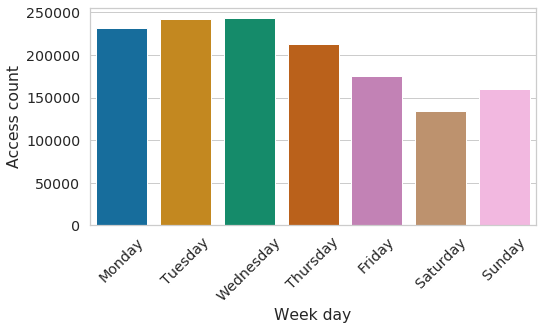

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.barplot(x='weekday', y='SessionStartTime', 
            data=df_sessions.groupby('weekday')['SessionStartTime'].count()[weekdays].reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Week day')
ticks = ax.set_xticklabels(weekdays, rotation=45)

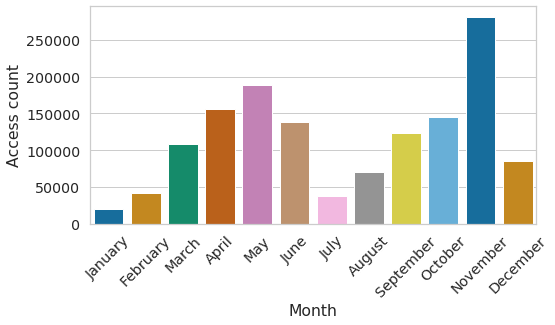

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.barplot(x='month', y='SessionStartTime', 
            data=df_sessions.groupby('month')['SessionStartTime'].count().reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Month')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
ticks = ax.set_xticklabels(months, rotation=45)

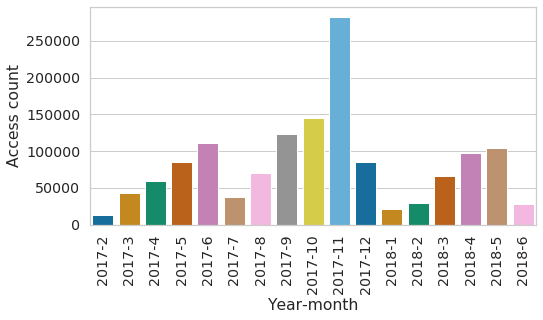

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.barplot(x='year-month', y='SessionStartTime', 
            data=df_sessions.groupby('year-month', sort=False)['SessionStartTime'].count().reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Year-month')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

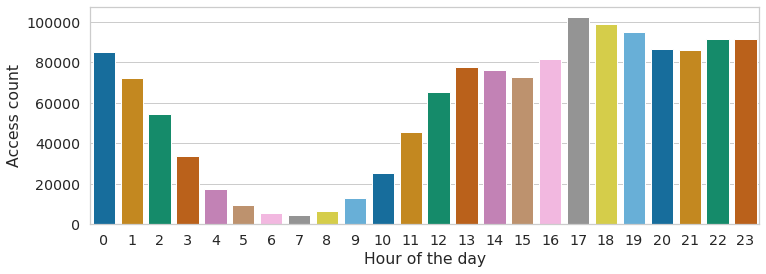

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
sns.barplot(x='hour', y='SessionStartTime', 
            data=df_sessions.groupby('hour', sort=False)['SessionStartTime'].count().reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Hour of the day')

Text(0.5, 0, 'Platform of access')

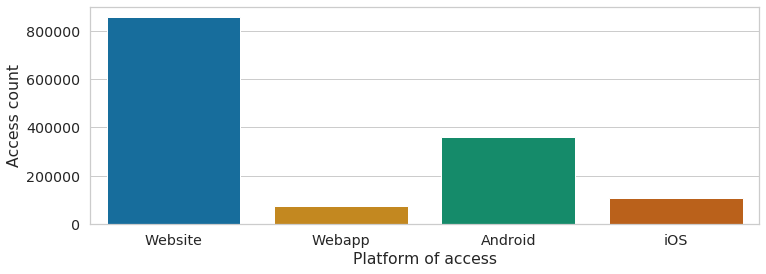

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
sns.barplot(x='StudentClient', y='SessionStartTime', 
            data=df_sessions.groupby('StudentClient', sort=False)['SessionStartTime'].count().reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Platform of access')

In [71]:
before_content_restr = df_sessions.query('"2017-05-01" < SessionStartTime < "2017-11-01"')
after_content_restr = df_sessions.query('SessionStartTime >= "2017-12-01"')

In [73]:
before_content_restr.SessionStartTime.describe()

count                  573123
unique                 551773
top       2017-08-10 18:39:53
freq                        7
first     2017-05-01 00:01:44
last      2017-10-31 23:59:48
Name: SessionStartTime, dtype: object

In [74]:
before_content_restr.groupby(['StudentId']).count()['StudentClient'].describe()

count    42394.000000
mean        13.518965
std         21.112950
min          1.000000
25%          3.000000
50%          7.000000
75%         16.000000
max       1012.000000
Name: StudentClient, dtype: float64

In [75]:
after_content_restr.SessionStartTime.describe()

count                  429653
unique                 407917
top       2018-03-06 04:34:18
freq                        6
first     2017-12-01 00:00:05
last      2018-06-08 05:01:51
Name: SessionStartTime, dtype: object

In [76]:
after_content_restr.groupby(['StudentId']).count()['StudentClient'].describe()

count    39542.000000
mean        10.865738
std         20.053389
min          1.000000
25%          2.000000
50%          5.000000
75%         12.000000
max       1605.000000
Name: StudentClient, dtype: float64

In [60]:
access_per_student = df_sessions.groupby(['StudentId']).count()['StudentClient']

In [63]:
access_per_student.describe()

count    60000.000000
mean        23.317700
std         39.589053
min          1.000000
25%          4.000000
50%         11.000000
75%         27.000000
max       2543.000000
Name: StudentClient, dtype: float64

In [62]:
access_per_student[access_per_student == 1]

StudentId
25946       1
50481       1
102235      1
103114      1
130812      1
           ..
99923043    1
99945450    1
99956032    1
99975922    1
99979591    1
Name: StudentClient, Length: 5308, dtype: int64

In [55]:
access_count = df_sessions.groupby(['StudentId', 'StudentClient']).count().sort_values('SessionStartTime')
access_count.query('SessionStartTime <= 2')

,,SessionStartTime
StudentId,StudentClient,
50199885,Website,1
54431893,Android,1
54438104,Website,1
54453240,Webapp,1
54462625,Website,1
...,...,...
4323578,Webapp,2
14258072,Webapp,2
14133992,Website,2


In [36]:
df_sessions.sort_values('SessionStartTime').head(100)

,StudentId,SessionStartTime,StudentClient
205146,82394932,2017-02-07 17:46:00,Website
205147,82394932,2017-02-07 17:53:33,Website
615932,32938466,2017-02-08 11:42:47,Website
4326,59828530,2017-02-08 11:46:22,Website
87112,51668081,2017-02-08 11:48:08,Website
...,...,...,...
318402,15818350,2017-02-08 18:13:50,Website
351700,63766632,2017-02-08 18:14:48,Website
82932,54316184,2017-02-08 18:17:28,Webapp
216426,87881432,2017-02-08 18:17:33,Website


### Dados sobre as matérias que cada usuário segue

In [78]:
df_subjects = pd.read_json('data/BASE B/subjects.json')
df_subjects['FollowDate'] = pd.to_datetime(df_subjects['FollowDate'])

df_subjects['year'] = df_subjects.FollowDate.dt.year
df_subjects['month'] = df_subjects.FollowDate.dt.month
df_subjects['year-month'] = df_subjects['year'].astype(str) + '-' + df_subjects['month'].astype(str)

df_subjects.sort_values('FollowDate', inplace=True)
df_subjects.head()

,StudentId,SubjectName,FollowDate,year,month,year-month
63571,87321417,Administração Financeira e Orçamentária I,2015-08-31 18:28:04,2015,8,2015-8
63572,87321417,Administração Financeira e Orçamentária II,2015-08-31 18:28:04,2015,8,2015-8
63569,87321417,Administração Financeira e Orçamentária,2015-08-31 18:28:04,2015,8,2015-8
42314,11356579,Eletrônica de Potência,2015-08-31 18:28:50,2015,8,2015-8
42317,11356579,Geração e Distribuição de Vapor,2015-08-31 18:28:50,2015,8,2015-8


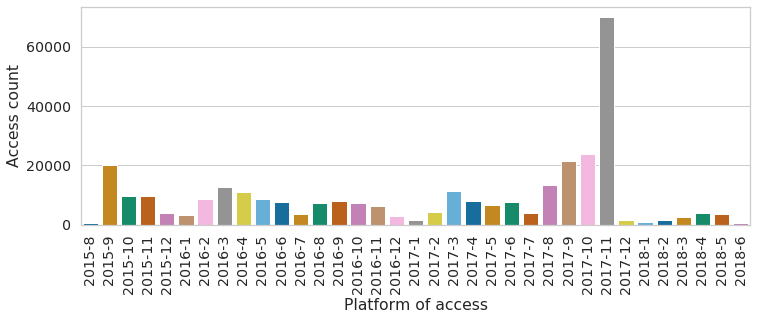

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
sns.barplot(x='year-month', y='SubjectName', 
            data=df_subjects.groupby('year-month', sort=False)['SubjectName'].count().reset_index(),
            palette='colorblind', ax=ax)
ax.set_ylabel('Access count')
ax.set_xlabel('Platform of access')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')

In [77]:
df_subjects.groupby('year-month', sort=False).count()['SubjectName']

year-month
2015-10     9549
2015-11     9476
2015-12     3843
2015-8       366
2015-9     20228
2016-1      3056
2016-10     7309
2016-11     6104
2016-12     2848
2016-2      8587
2016-3     12505
2016-4     10838
2016-5      8608
2016-6      7615
2016-7      3472
2016-8      7290
2016-9      7954
2017-1      1375
2017-10    23641
2017-11    69871
2017-12     1520
2017-2      4255
2017-3     11339
2017-4      8055
2017-5      6635
2017-6      7704
2017-7      4051
2017-8     13185
2017-9     21550
2018-1       746
2018-2      1481
2018-3      2667
2018-4      3953
2018-5      3444
2018-6       646
Name: SubjectName, dtype: int64

In [74]:
len(df_subjects.SubjectName.unique())

19711

### Dados sobre os arquivos que cada usuário visualizou
Big, more than 3M lines

In [24]:
df_file_views = pd.read_json('data/BASE B/fileViews.json')
df_file_views.head()

,StudentId,FileName,ViewDate,Studentclient
0,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:03.047000,Website
1,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:12.370000,Website
2,12970655,CALCULO I,2017-05-25 22:39:48.000000,Website
3,12970655,CALCULO I,2017-05-25 22:40:36.000000,Website
4,12970655,CALCULO I,2017-05-25 22:43:16.000000,Website
